In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import nltk


import seaborn as sn
import matplotlib.pyplot as plt

C:\Users\Himanshu\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_excel('BankReviews.xlsx',0)

In [3]:
data.tail()

,Date,Stars,Reviews,BankName
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank
504,2017-03-19,1,\r\nI was working with a loan consultant from ...,North American Savings Bank


In [4]:
data.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

In [5]:
data.BankName.value_counts()

North American Savings Bank       193
Guarenteed Rate Inc                81
Triumph Lending                    60
Reliance First Capital             58
Pacific Beneficial Mortgage Co     51
LoanSnap                           40
Wyndham Capital Mortgage           22
Name: BankName, dtype: int64

In [6]:
data.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [7]:
data.Reviews[0]

'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!'

In [8]:
data.Reviews[493]

'\r\nOur loan officer was happy to communicate before we committed. Once we committed he only communicated with us AFTER I questioned items and problems and AFTER I questioned why we weren\'t settling before our rate lock expired. We had no idea where we were in the process unless I contacted Steve. Poor, poor communication. Mr. Kang also was "sure" our house would appraise for $30k more than our house did, talking us into a loan that we didn\'t end up appraising for and then causing us to have to refinance at only .4% lower than our current mortgage. Our appraiser was disorganized and called twice for pictures he forgot. He used poor comps. We were contacted several times to look at documents that were expired before we could even sign on (within minutes of the email notifications). Only good was the actual settlement with a very sweet and competent notary (and thank goodness we were done). Poor process, poor communication - we will NEVER recommend NASB and I have already told two peo

In [9]:
data.Reviews[243]

'\r\nBuying a house is the most stressful thing I have done. Specially with the developer company I had to deal with!, but Mark and his team were the best !\r\nThey were always helpful, on time, and went the extra mile to help me and solve all my questions.\r\n\r\nI am really happy I chose them!, from the very beginning they showed their professionalism and their customer care skills.\r\n\r\nFrom the bottom of my heart! thank you!! for helping me get my first home!!\r\n\r\n... Read More\r\n        '

In [10]:
print('Review:', data.Reviews[19])


print('\n\n 1 or 5: ',data.Stars[19]) # 0 means bad and 1 means good
print('\n[1 means bad and 5 means good]')

Review: They were not upfront. Learn from my mistake... I trusted the loan officer that my zero point rate is an option before closing the loan because he convinced me to initially sign the Good Faith Estimate with higher rate plus lender's credit. After running my numbers, the lower interest is favorable for me and asking for it now, I'm being charge points. It looks like they are only good in their words at the beginning so please be careful dealing with this lender


 1 or 5:  1

[1 means bad and 5 means good]


In [11]:
print('Review:', data.Reviews[5])


print('\n\n 1 or 5: ',data.Stars[5]) # 0 means bad and 1 means good
print('\n[1 means negative review and 5 means positive review]')

Review: I had the pleasure of working with Wyndham Capital in September 2018 as my family and I were making a home purchase in Columbus, OH. From the original conversation with the loan officer to underwriting and all the way through closing, the entire team from Wyndham was very responsive and professional. I was VERY impressed with how smooth their process was and how timely the communication was given how stressful of a process home buying (and selling) can be


 1 or 5:  5

[1 means negative review and 5 means positive review]


In [12]:
X,y=data.Reviews,data.Stars

In [13]:
X.head(6)

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
5    I had the pleasure of working with Wyndham Cap...
Name: Reviews, dtype: object

In [14]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Stars, dtype: int64

In [15]:
# Pickling the dataset

import pickle
with open('Review.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('sent.pickle','wb') as f:
    pickle.dump(y,f)

In [16]:
# Unpickling dataset
X_in = open('Review.pickle','rb')
y_in = open('sent.pickle','rb')
X = pickle.load(X_in)
y = pickle.load(y_in)

In [17]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [18]:
X[243]

'\r\nBuying a house is the most stressful thing I have done. Specially with the developer company I had to deal with!, but Mark and his team were the best !\r\nThey were always helpful, on time, and went the extra mile to help me and solve all my questions.\r\n\r\nI am really happy I chose them!, from the very beginning they showed their professionalism and their customer care skills.\r\n\r\nFrom the bottom of my heart! thank you!! for helping me get my first home!!\r\n\r\n... Read More\r\n        '

In [19]:
corpus[243]
#The difference after applying regex and removing various punctuations

' buying house is the most stressful thing have done specially with the developer company had to deal with but mark and his team were the best they were always helpful on time and went the extra mile to help me and solve all my questions am really happy chose them from the very beginning they showed their professionalism and their customer care skills from the bottom of my heart thank you for helping me get my first home read more '

In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)

In [21]:
corpus[2]
#needs to need
# & and !! removed

'we had past experience with wyndham mortgage and would without question use again and again if needed wyndham went beyond the extra mile to not only right wrong encountered from the servicer we were dealing on our previous loan but they pulled together and found viable option for u that ultimately saved u money we would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage need sincerest thanks wyndham ed lind'

In [22]:
X[2]

'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind'

In [23]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

## TF-iDF Model

In [24]:
# Creating the Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [25]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33245169,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12340384, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1137738 , 0.08430181,
        0.1272345 ]])

In [26]:
vectorizer.get_feature_names()

['able',
 'also',
 'always',
 'amazing',
 'another',
 'answer',
 'answered',
 'anyone',
 'available',
 'back',
 'bank',
 'beginning',
 'best',
 'business',
 'buying',
 'call',
 'called',
 'came',
 'care',
 'close',
 'closed',
 'closing',
 'communication',
 'company',
 'cost',
 'could',
 'credit',
 'customer',
 'day',
 'definitely',
 'different',
 'document',
 'done',
 'easy',
 'email',
 'end',
 'entire',
 'even',
 'ever',
 'every',
 'everything',
 'excellent',
 'experience',
 'extremely',
 'family',
 'feel',
 'first',
 'friend',
 'friendly',
 'future',
 'get',
 'getting',
 'go',
 'going',
 'good',
 'got',
 'great',
 'ha',
 'happy',
 'hard',
 'help',
 'helped',
 'helpful',
 'highly',
 'home',
 'house',
 'interest',
 'issue',
 'kept',
 'know',
 'knowledgeable',
 'later',
 'lender',
 'lending',
 'like',
 'loan',
 'looking',
 'made',
 'make',
 'many',
 'mortgage',
 'much',
 'nasb',
 'need',
 'needed',
 'never',
 'new',
 'next',
 'officer',
 'one',
 'patient',
 'phone',
 'pleasure',
 'possi

In [27]:
pd.DataFrame(X,columns=list(vectorizer.get_feature_names()))

,able,also,always,amazing,another,answer,answered,anyone,available,back,...,way,week,well,went,within,work,worked,working,would,year
0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.233387,0.0,0.000000,0.000000,0.000000,0.332452,0.000000
3,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.217859,0.0,0.000000,0.000000,0.000000,0.155166,0.000000
4,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,0.299774,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.261482,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.07283,0.072347,0.0,0.0,0.00000,0.0,0.081846,0.127651,0.0,0.00000,...,0.071413,0.068436,0.0,0.064803,0.0,0.000000,0.059782,0.000000,0.230774,0.139320
501,0.00000,0.156371,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.16303,...,0.000000,0.147917,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.150564
502,0.00000,0.000000,0.0,0.0,0.18993,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.328897,0.0,0.000000,0.0,0.124027,0.000000,0.000000,0.000000,0.000000
503,0.00000,0.123404,0.0,0.0,0.13482,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.233465,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
X.shape

(505, 137)

In [29]:
type(X)

numpy.ndarray

In [30]:
y.shape

(505,)

## Applying Logistic Model

In [31]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,
                                              y,
                                              test_size=0.3,
                                              random_state=500)

In [32]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(353, 137) (152, 137) (353,) (152,)


In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
train_pred=pd.DataFrame({'actual':train_y,'predicted':logreg.predict(train_x)})
train_pred

,actual,predicted
329,5,5
303,5,5
426,5,5
211,5,5
422,5,5
...,...,...
206,5,5
273,5,5
321,5,5
439,5,5


In [35]:
#for test
test_pred=pd.DataFrame({'actual':test_y,'predicted':logreg.predict(test_x)})
test_pred

,actual,predicted
59,5,5
71,5,5
368,5,5
324,5,5
162,5,5
...,...,...
351,5,5
207,5,5
54,5,5
398,5,5


In [36]:
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.881578947368421
train_accuracy:  0.9320113314447592


## Creating Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

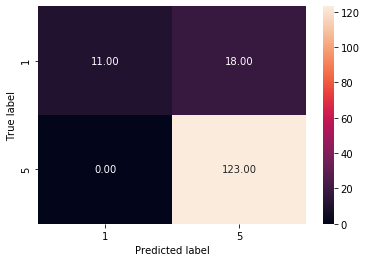

In [39]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            logreg.predict(test_x), [1,5] )
cm



sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [41]:
#Concatenating final prediction with original data set(all observations):

pred_stars=pd.DataFrame(logreg.predict(X),columns=['predicted_stars'])
  
testfile = pd.concat([data, pred_stars], axis=1)

testfile.head(15)


,Date,Stars,Reviews,BankName,predicted_stars
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,5
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,5
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,5
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,5
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,5
5,2016-12-20,5,I had the pleasure of working with Wyndham Cap...,Wyndham Capital Mortgage,5
6,2017-12-17,5,My experience with Mattison was beyond greatly...,Wyndham Capital Mortgage,5
7,2016-08-16,5,Patrick answered all my questions by email imm...,Wyndham Capital Mortgage,5
8,2017-09-04,5,I loved working with this group of people! The...,Wyndham Capital Mortgage,5
9,2016-03-22,5,Great web interface for both the loan applicat...,Wyndham Capital Mortgage,5


### Multinomial Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB as NB

In [44]:
classifier = NB(alpha=2)  #alpha=0 means no laplace smoothing
classifier.fit(train_x, train_y)


MultinomialNB(alpha=2, class_prior=None, fit_prior=True)

In [45]:
predictions = classifier.predict(test_x)

In [48]:
print("Accuracy: ", metrics.accuracy_score(test_y, predictions))

Accuracy:  0.8486842105263158


In [51]:
cm = metrics.confusion_matrix(test_y,predictions)
cm

array([[  6,  23],
       [  0, 123]], dtype=int64)

## Naive Bayes is giving less accuracy than Logistic.
## So we will use Logistic as final Model

## Final Submission File

In [42]:
testfile.to_csv('Review_submission_Capstone_5.csv',index=False)